In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB # 다항분포 나이브 베이즈 모델
from sklearn.metrics import accuracy_score #정확도 계산
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
from tensorflow import keras
from tqdm import tqdm
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN

In [3]:
import pandas as pd
df_raw = pd.read_csv('C:/Users/trxgfcg/OneDrive/바탕 화면/big/train.csv')

df_raw

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


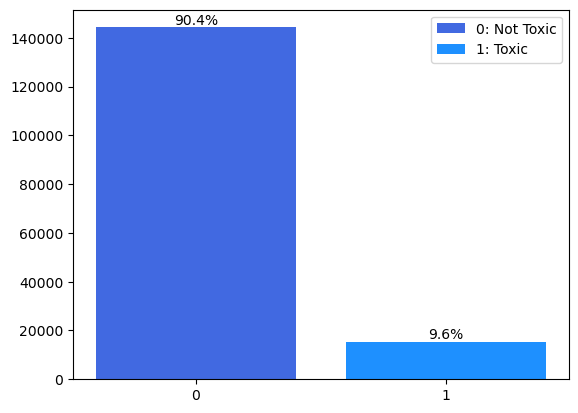

In [4]:
# 막대 그래프 그리기
import matplotlib.pyplot as plt
total_count = df_raw['toxic'].count()
bars = plt.bar([0, 1], df_raw['toxic'].value_counts().values, color=['#4169E1', '#1E90FF'])

# x축 눈금과 레이블 설정
plt.xticks([0, 1], ['0', '1'])

# 범례 추가
plt.legend(bars, ['0: Not Toxic', '1: Toxic'])
for bar in bars:
    height = bar.get_height()
    percentage = height / total_count * 100
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%.1f%%' % percentage, ha='center', va='bottom')

plt.savefig('C:/Users/trxgfcg/OneDrive/바탕 화면/학위논문_배경득/toxic_ratio.png')
# 그래프 표시
plt.show()


In [4]:
df_raw.drop_duplicates(subset=['comment_text'], inplace=True)
print('총 샘플의 수 :',len(df_raw))

총 샘플의 수 : 159571


In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd

# NLTK 데이터 다운로드
nltk.download('punkt')
nltk.download('stopwords')

# 영어 불용어 목록
stop_words = set(stopwords.words('english'))

# 데이터 로드 (예시로 DataFrame을 사용합니다)
# 여기서는 DataFrame의 'text' 열에 텍스트 데이터가 있다고 가정합니다.
# 실제 데이터에 맞게 수정해야 합니다.
# 예시: df = pd.read_csv('your_dataset.csv')
# 데이터프레임의 'text' 열에 텍스트 데이터가 들어있다고 가정
# df['text']에 해당하는 컬럼명을 사용하세요.

# 예시 데이터


# 데이터프레임 생성 (실제 데이터에 맞게 수정해야 함)
df = pd.DataFrame(df_raw, columns=['comment_text'])

# 불용어 제거 함수 정의
def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_text = [word for word in tokens if word.lower() not in stop_words]
    return " ".join(filtered_text)

# 각 텍스트에 대해 불용어 제거 적용
df['comment_text'] = df['comment_text'].apply(remove_stopwords)

# 결과 출력
print(df)
df_raw['comment_text'] = df

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\trxgfcg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\trxgfcg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                             comment_text
0       Explanation edits made username Hardcore Metal...
1       D'aww ! matches background colour 'm seemingly...
2       Hey man , 'm really trying edit war . 's guy c...
3       `` ca n't make real suggestions improvement - ...
4                , sir , hero . chance remember page 's ?
...                                                   ...
159566  `` : : : : : second time asking , view complet...
159567  ashamed horrible thing put talk page . 128.61....
159568  Spitzer Umm , theres actual article prostituti...
159569  looks like actually put speedy first version d...
159570  `` ... really n't think understand . came idea...

[159571 rows x 1 columns]


In [6]:
data = df_raw['comment_text'].copy()

In [7]:
data.target = df_raw['toxic'].copy()

In [8]:
x_train, x_valid, y_train, y_valid= train_test_split(data, data.target, test_size=0.2, random_state=42)

In [9]:
dtmvector = CountVectorizer()
X_train_dtm = dtmvector.fit_transform(x_train)
print(X_train_dtm.shape)

(127656, 165755)


In [10]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(X_train_dtm)
print(tfidfv.shape)

(127656, 165755)


In [11]:
mod = MultinomialNB()
mod.fit(tfidfv, y_train)

MultinomialNB()

In [12]:
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB()

In [13]:
df_test = pd.concat([x_valid, y_valid], axis=1)

In [14]:
X_test_dtm = dtmvector.transform(x_valid) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(X_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_valid, predicted)) #예측값과 실제값 비교

from sklearn.metrics import f1_score

toxic_f1 = f1_score(y_valid, predicted)

print("F1-score:", toxic_f1)

정확도: 0.9210402631991227
F1-score: 0.3003886729594669


In [15]:
def print_class_num(df, label_name):            # 이진 클래스의 비율을 알아보기 위한 함수
  n_total = len(df)                             # 데이터의 총 개수
  n_neg = len(df.query(label_name + ' == 1'))   # label로 사용하는 열의 1 개수
  n_pos = len(df.query(label_name + ' == 0'))   # label로 사용하는 열의 0 개수

  print("부정 댓글: {}개, {:.2f}%".format(n_neg, n_neg*100/n_total))
  print("긍정 댓글: {}개, {:.2f}%\n".format(n_pos, n_pos*100/n_total))

  values = df[label_name].value_counts()        # label로 사용하는 열의 값을 카운트
  values.plot(kind='bar')
  print(values)

In [1]:
print_class_num(df_test, 'toxic')

NameError: name 'print_class_num' is not defined

In [17]:
#pip uninstall scikit-learn -y


In [18]:
#pip uninstall imbalanced-learn -y


In [19]:
import sklearn
print(sklearn.__version__)


1.2.2


In [20]:
#pip install scikit-learn==1.2.2

In [21]:
#pip install imbalaced-learn

In [22]:
#pip install scikit-learn
from imblearn.over_sampling import SMOTE

In [23]:
from imblearn.over_sampling import SMOTE


In [24]:
tfidf_transformer = TfidfTransformer()
tfidfv_smote = tfidf_transformer.fit_transform(X_train_dtm)
print(tfidfv_smote.shape)

(127656, 165755)


In [25]:
smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(tfidfv_smote, y_train)
#print("SMOTE 적용 전 학습용 피처/레이블 데이터 세트 : ", x_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트 :', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 값의 분포 :\n',pd.Series(y_train_over).value_counts() )

SMOTE 적용 후 학습용 피처/레이블 데이터 세트 : (230836, 165755) (230836,)
SMOTE 적용 후 값의 분포 :
 toxic
1    115418
0    115418
Name: count, dtype: int64


In [26]:
mod = MultinomialNB()
smote_n = mod.fit(X_train_over, y_train_over)

In [27]:
smote_n

MultinomialNB()

In [28]:
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB()

In [29]:
X_test_dtm = dtmvector.transform(x_valid) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(X_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_valid, predicted)) #예측값과 실제값 비교

정확도: 0.9230455898480339


In [30]:
#from sklearn.metrics import f1_score

#orginal_f1 = f1_score(y_valid, predicted)

#print("F1-score:", original_f1)

In [31]:
from sklearn.naive_bayes import BernoulliNB

# 이진 분류를 위한 Bernoulli Naive Bayes 분류기 생성
model = BernoulliNB()
smote_n2 = model.fit(X_train_over, y_train_over)

In [32]:
BernoulliNB(alpha=1.0, binarize=None, class_prior=None, fit_prior=True)

BernoulliNB(binarize=None)

In [33]:
X_test_dtm = dtmvector.transform(x_valid) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(X_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_valid, predicted)) #예측값과 실제값 비교

정확도: 0.639667867773774


In [34]:
from sklearn.metrics import f1_score

f1 = f1_score(y_valid, predicted)

print("F1-score:", f1)

F1-score: 0.3236885438720301


In [35]:
from imblearn.over_sampling import ADASYN
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

Amodels = []
f1_scores_A = [] 
# 테스트 데이터를 TF-IDF로 변환
X_test_dtm = dtmvector.transform(x_valid)
tfidfv_test = tfidf_transformer.transform(X_test_dtm)

# ADASYN을 사용하여 오버샘플링하고 정확도 측정
for i in range(3, 11):
    # ADASYN을 사용하여 오버샘플링
    adasyn = ADASYN(sampling_strategy=i/10)
    X_train_adasyn, y_train_adasyn = adasyn.fit_resample(tfidfv_smote, y_train)

    # 모델 학습
    mod = MultinomialNB()
    mod.fit(X_train_adasyn, y_train_adasyn)
    
    #모델추가
    Amodels.append(mod)

    # 예측
    predicted = mod.predict(tfidfv_test)

    # F1-score 출력
    f1 = f1_score(y_valid, predicted)
    f1_scores_A.append(f1)
    print(f"sampling_strategy={i/10}: F1-score={f1}")


sampling_strategy=0.3: F1-score=0.5871559633027523
sampling_strategy=0.4: F1-score=0.6483493951199508
sampling_strategy=0.5: F1-score=0.6858778625954197
sampling_strategy=0.6: F1-score=0.7107085775173148
sampling_strategy=0.7: F1-score=0.7045173267326733
sampling_strategy=0.8: F1-score=0.6938539407086044
sampling_strategy=0.9: F1-score=0.6758882560347167
sampling_strategy=1.0: F1-score=0.6541554959785524


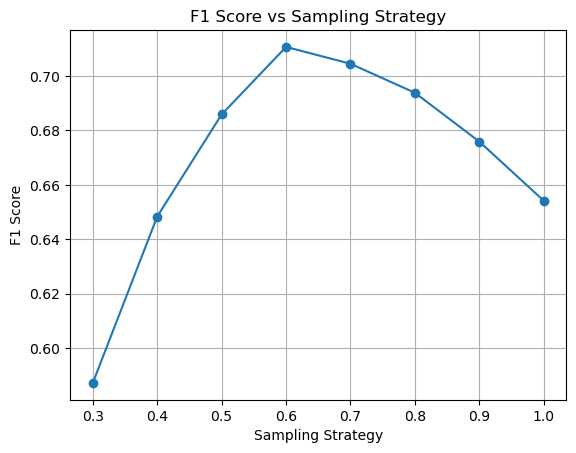

In [36]:
import matplotlib.pyplot as plt

sampling_strategies = [i/10 for i in range(3, 11)]

plt.plot(sampling_strategies, f1_scores_A, marker='o')
plt.title('F1 Score vs Sampling Strategy')
plt.xlabel('Sampling Strategy')
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()


In [37]:
from imblearn.over_sampling import ADASYN
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

f1_scores_S = [] 
# 테스트 데이터를 TF-IDF로 변환
X_test_dtm = dtmvector.transform(x_valid)
tfidfv_test = tfidf_transformer.transform(X_test_dtm)

Smodels = []

# ADASYN을 사용하여 오버샘플링하고 정확도 측정
for i in range(3, 11):
    # ADASYN을 사용하여 오버샘플링
    smote = SMOTE(sampling_strategy=i/10)
    X_train_smote, y_train_smote = smote.fit_resample(tfidfv_smote, y_train)

    # 모델 학습
    mod = MultinomialNB()
    mod.fit(X_train_smote, y_train_smote)
    # 생성된 모델을 리스트에 추가
    Smodels.append(mod)

    # 예측
    predicted = mod.predict(tfidfv_test)


   # F1-score 출력
    f1 = f1_score(y_valid, predicted)
    f1_scores_S.append(f1)
    print(f"sampling_strategy={i/10}: F1-score={f1}")


sampling_strategy=0.3: F1-score=0.5944506104328524
sampling_strategy=0.4: F1-score=0.6517220297534135
sampling_strategy=0.5: F1-score=0.6893810335036911
sampling_strategy=0.6: F1-score=0.7112440612352631
sampling_strategy=0.7: F1-score=0.7094771241830065
sampling_strategy=0.8: F1-score=0.6994668697638995
sampling_strategy=0.9: F1-score=0.6892026815004992
sampling_strategy=1.0: F1-score=0.670332618025751


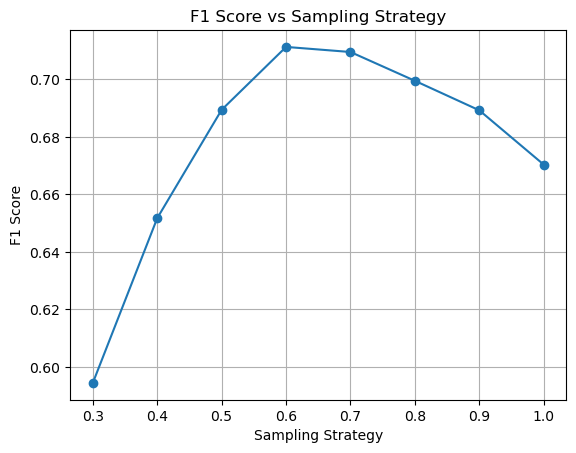

In [38]:
import matplotlib.pyplot as plt

sampling_strategies = [i/10 for i in range(3, 11)]

plt.plot(sampling_strategies, f1_scores_S, marker='o')
plt.title('F1 Score vs Sampling Strategy')
plt.xlabel('Sampling Strategy')
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()


In [39]:
from imblearn.over_sampling import ADASYN
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
f1_scores_B = [] 
Bmodels = [] 

# 테스트 데이터를 TF-IDF로 변환
X_test_dtm = dtmvector.transform(x_valid)
tfidfv_test = tfidf_transformer.transform(X_test_dtm)

# ADASYN을 사용하여 오버샘플링하고 정확도 측정
for i in range(3, 11):
    # ADASYN을 사용하여 오버샘플링
    Bsmote = BorderlineSMOTE(sampling_strategy=i/10)
    X_train_B, y_train_B = Bsmote.fit_resample(tfidfv_smote, y_train)

    # 모델 학습
    mod = MultinomialNB()
    mod.fit(X_train_B, y_train_B)
    # 생성된 모델을 리스트에 추가
    Bmodels.append(mod)

    # 예측
    predicted = mod.predict(tfidfv_test)

    # F1-score 출력
    f1 = f1_score(y_valid, predicted)
    f1_scores_B.append(f1)
    print(f"sampling_strategy={i/10}: F1-score={f1}")


sampling_strategy=0.3: F1-score=0.5945945945945946
sampling_strategy=0.4: F1-score=0.6547522339561331
sampling_strategy=0.5: F1-score=0.6922932683292706
sampling_strategy=0.6: F1-score=0.7112651646447139
sampling_strategy=0.7: F1-score=0.7080864691753402
sampling_strategy=0.8: F1-score=0.6966761067223133
sampling_strategy=0.9: F1-score=0.6829336307863915
sampling_strategy=1.0: F1-score=0.6600288222193109


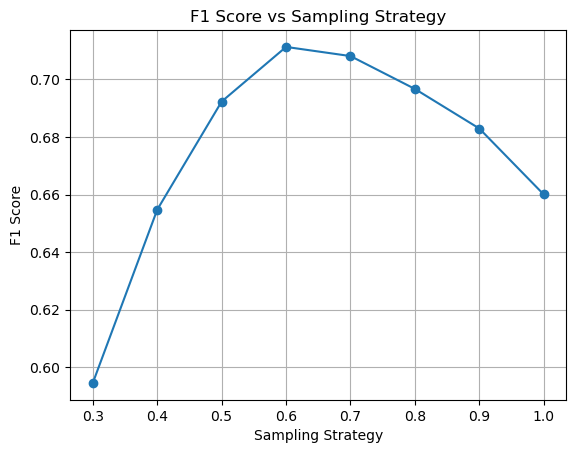

In [40]:
import matplotlib.pyplot as plt

sampling_strategies = [i/10 for i in range(3, 11)]

plt.plot(sampling_strategies, f1_scores_B, marker='o')
plt.title('F1 Score vs Sampling Strategy')
plt.xlabel('Sampling Strategy')
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()


In [41]:
def ensemble_models_prediction(models, X_test):
    predictions = []
    for model in models:
        prediction = model.predict(X_test)
        predictions.append(prediction)
    ensemble_prediction = np.mean(predictions, axis=0)
    return ensemble_prediction


In [42]:
Amodels[2:5]

[MultinomialNB(), MultinomialNB(), MultinomialNB()]

In [43]:
from itertools import combinations
from sklearn.metrics import f1_score
import numpy as np

# 모델 리스트 생성
models = Amodels[2:5] + Bmodels[2:5] + Smodels[2:5]
model_names = ['A.5','A.6','A.7','B.5','B.6','B.7','S.5','S.6','S.7']

best_f1_score = 0
best_model_combination = None

# 가능한 모든 모델 조합을 생성
for r in range(2, len(models) + 1):
    model_combinations = combinations(models, r)
    
    # 각 조합에 대해 교차 검증 수행
    for combination in model_combinations:
        ensemble_models = list(combination)
        ensemble_names = [model_names[models.index(model)] for model in ensemble_models]
        
        # 여기서 ensemble_models와 ensemble_names를 활용하여 모델을 합쳐서 사용할 수 있습니다.
        ensemble_prediction = ensemble_models_prediction(ensemble_models, tfidfv_test)
        
        # 0.5를 기준으로 이진 클래스로 변환
        ensemble_prediction_binary = np.where(ensemble_prediction >= 0.5, 1, 0)
        
        # F1 점수 계산
        f1 = f1_score(y_valid, ensemble_prediction_binary)
        
        # 현재 조합이 더 좋은 경우 업데이트
        if f1 > best_f1_score:
            best_f1_score = f1
            best_model_combination = ensemble_names

# 최적의 모델 조합과 성능 출력
print("Best model combination:", best_model_combination)
print("Best F1 score:", best_f1_score)


Best model combination: ['A.6', 'B.5', 'B.7', 'S.5', 'S.6', 'S.7']
Best F1 score: 0.7132867132867131


In [44]:
##real data

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB # 다항분포 나이브 베이즈 모델
from sklearn.metrics import accuracy_score #정확도 계산
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
from tensorflow import keras
from tqdm import tqdm
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN

In [46]:

data = pd.read_csv('C:/Users/trxgfcg/OneDrive/바탕 화면/big/review_realtotal.csv')

In [47]:

data2 = pd.read_csv('C:/Users/trxgfcg/OneDrive/바탕 화면/big/review_realtotal.csv')

In [48]:
import pandas as pd

# 데이터프레임 생성 (예시)

#data = pd.read_csv('C:/Users/trxgfcg/OneDrive/바탕 화면/big/review_realtotal.csv')
## 'Recommended'를 1로, 'Not Recommended'를 0으로 바꾸기
data['recommend_text'] = data['recommend_text'].replace({'Recommended': 1, 'Not Recommended': 0})#

# label 열의 값이 1인 행의 인덱스를 찾습니다.
#indices_to_drop = data[data['recommend_text'] == 0].sample(frac=0.5, random_state=42).index

#len(indices_to_drop)
# 인덱스를 기반으로 데이터프레임에서 해당 행을 삭제합니다.
#data = data.drop(indices_to_drop)

#print(data)


In [49]:
data2

,recommend_text,element_text
0,Recommended,You can convince bosses to kill themselves. 10/10
1,Recommended,my work is really cutting into my Baldur's Gat...
2,Recommended,Possessed a guard and had them open a gate con...
3,Recommended,To sum up this game in a way only players will...
4,Recommended,I like the part where the game doesn't have mi...
...,...,...
94615,Recommended,wait 5min just for opponent to draw their exodia
94616,Recommended,Instead of putting a down payment on your new ...
94617,Not Recommended,Quick Duel = Waiting opponents loading...........
94618,Recommended,ye


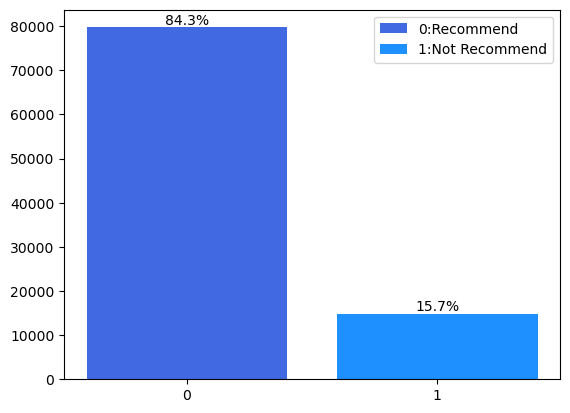

In [50]:
# 막대 그래프 그리기
import matplotlib.pyplot as plt
total_count = data['recommend_text'].count()
bars = plt.bar([0, 1], data['recommend_text'].value_counts().values, color=['#4169E1', '#1E90FF'])

# x축 눈금과 레이블 설정
plt.xticks([0, 1], ['0', '1'])

# 범례 추가
plt.legend(bars, ['0:Recommend', '1:Not Recommend'])
for bar in bars:
    height = bar.get_height()
    percentage = height / total_count * 100
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%.1f%%' % percentage, ha='center', va='bottom')

plt.savefig('C:/Users/trxgfcg/OneDrive/바탕 화면/학위논문_배경득/real_ratio.png')
# 그래프 표시
plt.show()


In [51]:
data['element_text']

0        You can convince bosses to kill themselves. 10/10
1        my work is really cutting into my Baldur's Gat...
2        Possessed a guard and had them open a gate con...
3        To sum up this game in a way only players will...
4        I like the part where the game doesn't have mi...
                               ...                        
94615     wait 5min just for opponent to draw their exodia
94616    Instead of putting a down payment on your new ...
94617    Quick Duel = Waiting opponents loading...........
94618                                                   ye
94619    the game was good, got good animation and same...
Name: element_text, Length: 94620, dtype: object

In [52]:
print('v2열의 유니크한 값 :',data['element_text'].nunique())

v2열의 유니크한 값 : 85940


In [53]:
data.drop_duplicates(subset=['element_text'], inplace=True)
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 85941


In [57]:
# 'element_text' 열의 데이터 타입이 'object'로 표시되지만 숫자로 저장되어 있는 경우
# 숫자를 문자열로 변환하여 다시 저장
data['element_text'] = data['element_text'].astype(str)


In [58]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd

# NLTK 데이터 다운로드
nltk.download('punkt')
nltk.download('stopwords')

# 영어 불용어 목록
stop_words = set(stopwords.words('english'))

# 데이터 로드 (예시로 DataFrame을 사용합니다)
# 여기서는 DataFrame의 'text' 열에 텍스트 데이터가 있다고 가정합니다.
# 실제 데이터에 맞게 수정해야 합니다.
# 예시: df = pd.read_csv('your_dataset.csv')
# 데이터프레임의 'text' 열에 텍스트 데이터가 들어있다고 가정
# df['text']에 해당하는 컬럼명을 사용하세요.

# 예시 데이터


# 데이터프레임 생성 (실제 데이터에 맞게 수정해야 함)
df = pd.DataFrame(data, columns=['element_text'])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\trxgfcg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\trxgfcg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:

# 불용어 제거 함수 정의
def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_text = [word for word in tokens if word.lower() not in stop_words]
    return " ".join(filtered_text)

# 각 텍스트에 대해 불용어 제거 적용
df['element_text'] = df['element_text'].apply(remove_stopwords)

# 결과 출력
print(df)
data['element_text'] = df

                                            element_text
0                           convince bosses kill . 10/10
1      work really cutting Baldur 's Gate 3 time . qu...
2      Possessed guard open gate containing giant spi...
3      sum game way players understand : game unique ...
4                   like part game n't microtransactions
...                                                  ...
94614  game much fun prob one favorite games play fri...
94615                     wait 5min opponent draw exodia
94616  Instead putting payment new house , spend . n'...
94617  Quick Duel = Waiting opponents loading ..........
94619  game good , got good animation like manga anim...

[85941 rows x 1 columns]


In [60]:
print(df['element_text'].dtype)


object


In [61]:
review = data['element_text'].copy()

In [62]:
data.target = data['recommend_text']

C:\Users\trxgfcg\AppData\Local\Temp\ipykernel_8888\2512679356.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.target = data['recommend_text']


In [63]:
x_train, x_valid, y_train, y_valid= train_test_split(review, data.target, test_size=0.2, random_state=42)

In [64]:
x_train.fillna('', inplace=True)

In [65]:
dtmvector = CountVectorizer()
X_train_dtm = dtmvector.fit_transform(x_train)
print(X_train_dtm.shape)

(68752, 69012)


In [66]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(X_train_dtm)
print(tfidfv.shape)

(68752, 69012)


In [67]:
mod = MultinomialNB()
orginal = mod.fit(tfidfv, y_train)

In [68]:
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB()

In [69]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# 결측치를 빈 문자열로 대체
x_valid.fillna('', inplace=True)

# CountVectorizer로 변환
X_test_dtm = dtmvector.transform(x_valid)
tfidfv_test = tfidf_transformer.transform(X_test_dtm)

predicted = mod.predict(tfidfv_test)  # 테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_valid, predicted)) #예측값과 실제값 비교

정확도: 0.8393158415265577


In [70]:
from sklearn.metrics import f1_score

f1 = f1_score(y_valid, predicted)

print("F1-score:", f1)

F1-score: 0.9117346286590823


In [71]:
original_f1_real = f1_score(y_valid, predicted)

In [72]:
def print_class_num(df, label_name):            # 이진 클래스의 비율을 알아보기 위한 함수
  n_total = len(df)                             # 데이터의 총 개수
  n_neg = len(df.query(label_name + ' == 1'))   # label로 사용하는 열의 1 개수
  n_pos = len(df.query(label_name + ' == 0'))   # label로 사용하는 열의 0 개수

  print("부정 댓글: {}개, {:.2f}%".format(n_neg, n_neg*100/n_total))
  print("긍정 댓글: {}개, {:.2f}%\n".format(n_pos, n_pos*100/n_total))

  values = df[label_name].value_counts()        # label로 사용하는 열의 값을 카운트
  values.plot(kind='bar')
  print(values)

In [73]:
df_test = pd.concat([x_valid, y_valid], axis=1)

In [74]:
df_train = pd.concat([x_train, y_train], axis=1)

부정 댓글: 14305개, 83.22%
긍정 댓글: 2884개, 16.78%

recommend_text
1    14305
0     2884
Name: count, dtype: int64


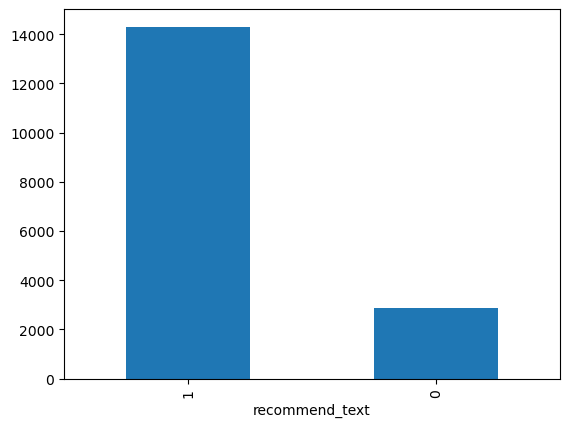

In [75]:
print_class_num(df_test, 'recommend_text')

부정 댓글: 57159개, 83.14%
긍정 댓글: 11593개, 16.86%

recommend_text
1    57159
0    11593
Name: count, dtype: int64


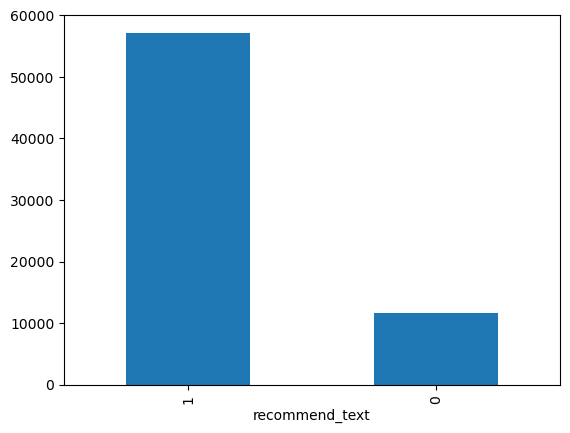

In [76]:
print_class_num(df_train, 'recommend_text')

In [77]:
from imblearn.over_sampling import SMOTE

In [78]:
tfidf_transformer = TfidfTransformer()
tfidfv_smote = tfidf_transformer.fit_transform(X_train_dtm)
print(tfidfv_smote.shape)

(68752, 69012)


In [79]:
smote = SMOTE(sampling_strategy=5/10)
X_train_over, y_train_over = smote.fit_resample(tfidfv_smote, y_train)
#print("SMOTE 적용 전 학습용 피처/레이블 데이터 세트 : ", x_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트 :', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 값의 분포 :\n',pd.Series(y_train_over).value_counts() )

SMOTE 적용 후 학습용 피처/레이블 데이터 세트 : (85738, 69012) (85738,)
SMOTE 적용 후 값의 분포 :
 recommend_text
1    57159
0    28579
Name: count, dtype: int64


In [80]:
mod = MultinomialNB()
smote_n = mod.fit(X_train_over, y_train_over)

In [81]:
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB()

In [82]:
import pandas as pd
b_df = pd.DataFrame(columns=['recommend_text'])
#element_df = pd.DataFrame(columns=['element_text'])


for i in range(0,len(y_train_over)):
    # recommend[1].text를 DataFrame으로 변환
    #recommend_df = pd.concat([recommend_df, pd.DataFrame({'recommend_text': [recommend[i].text]})], ignore_index=True)
    # element[1].text를 DataFrame으로 변환
    b_df = pd.concat([b_df, pd.DataFrame({'recommend_text': [y_train_over[i]]})], ignore_index=True)


부정 댓글: 57159개, 66.67%
긍정 댓글: 28579개, 33.33%

recommend_text
1    57159
0    28579
Name: count, dtype: int64


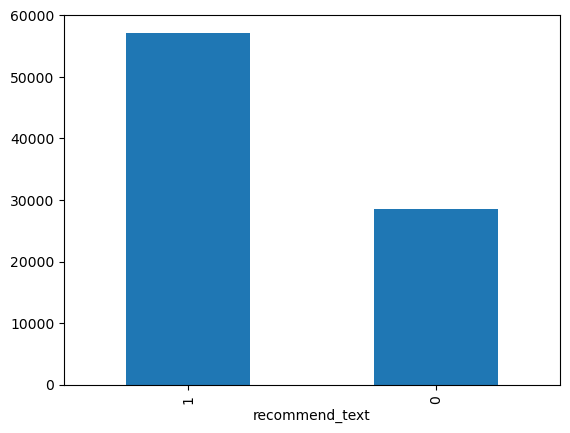

In [83]:
print_class_num(b_df, 'recommend_text')

In [84]:
X_test_dtm = dtmvector.transform(x_valid) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(X_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_valid, predicted)) #예측값과 실제값 비교

정확도: 0.8819593926348246


In [85]:
from sklearn.metrics import f1_score

f1 = f1_score(y_valid, predicted)

print("F1-score:", f1)

F1-score: 0.9314457546372943


In [86]:
from sklearn.naive_bayes import BernoulliNB

# 이진 분류를 위한 Bernoulli Naive Bayes 분류기 생성
model = BernoulliNB()
smote_n2 = model.fit(X_train_over, y_train_over)

In [87]:
BernoulliNB(alpha=1.0, binarize=None, class_prior=None, fit_prior=True)

BernoulliNB(binarize=None)

In [88]:
X_test_dtm = dtmvector.transform(x_valid) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(X_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_valid, predicted)) #예측값과 실제값 비교

정확도: 0.7969631741229857


In [89]:
#Borderline-SMOTE
from imblearn.over_sampling import BorderlineSMOTE
X_resampled_B, y_resampled_B = BorderlineSMOTE(random_state=0).fit_resample(tfidfv_smote, y_train)


recommend_text
0    57159
1    57159
Name: count, dtype: int64


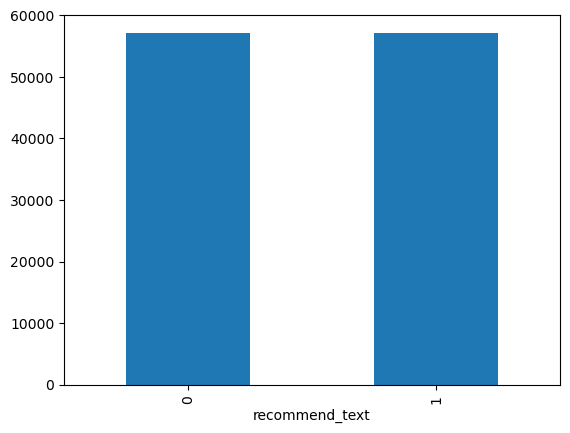

In [90]:
values = pd.Series(y_resampled_B).value_counts()
values.plot(kind='bar')
print(values)

In [91]:
print('Borderline SMOTE 적용 후 값의 분포 :\n',pd.Series(y_resampled_B).value_counts() )

Borderline SMOTE 적용 후 값의 분포 :
 recommend_text
0    57159
1    57159
Name: count, dtype: int64


In [92]:
mod = MultinomialNB()
Bsmote_n = mod.fit(X_resampled_B, y_resampled_B)

In [93]:
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB()

In [94]:
X_test_dtm = dtmvector.transform(x_valid) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(X_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_valid, predicted)) #예측값과 실제값 비교

정확도: 0.8261678980743499


In [95]:
from sklearn.metrics import f1_score

f1 = f1_score(y_valid, predicted)

print("F1-score:", f1)

F1-score: 0.8880731195684747


In [96]:
#ADASYN
from imblearn.over_sampling import ADASYN
X_resampled_A, y_resampled_A = ADASYN(random_state=42).fit_resample(tfidfv_smote, y_train)


recommend_text
1    57159
0    54793
Name: count, dtype: int64


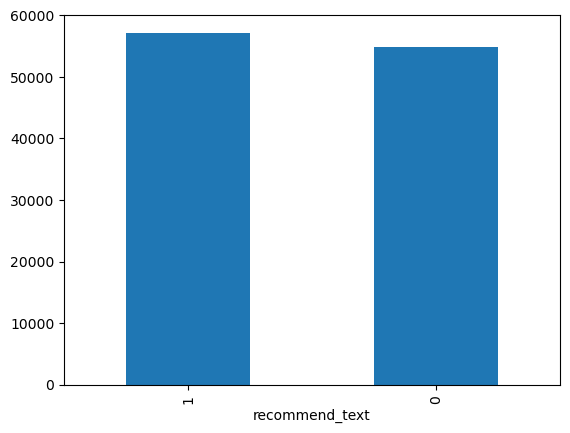

In [97]:
values = pd.Series(y_resampled_A).value_counts()
values.plot(kind='bar')
print(values)

In [98]:
mod = MultinomialNB()
ADASYN = mod.fit(X_resampled_A, y_resampled_A)

In [99]:
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB()

In [100]:
X_test_dtm = dtmvector.transform(x_valid) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(X_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_valid, predicted)) #예측값과 실제값 비교

정확도: 0.8464715806620513


In [101]:
from sklearn.metrics import f1_score

f1 = f1_score(y_valid, predicted)

print("F1-score:", f1)

F1-score: 0.9026091449237924


In [102]:
import numpy as np

def ensemble_models(models, X):
    predictions = np.zeros((X.shape[0], len(models)))
    
    # 각 모델에 대해 예측을 수행
    for i, model in enumerate(models):
        predictions[:, i] = model.predict(X)
    
    # 예측값들의 평균 계산
    ensemble_prediction = np.mean(predictions, axis=1)
    
    # 평균값을 이진 예측으로 변환
    ensemble_prediction_binary = (ensemble_prediction > 0.5).astype(int)
    
    return ensemble_prediction_binary

# models는 각 모델의 리스트로 가정합니다.
# 예를 들어, model1, model2, model3가 들어있는 리스트
models = [Bsmote_n,smote_n,orginal]

# 테스트 데이터에 대한 앙상블 예측 수행
ensemble_prediction = ensemble_models(models, tfidfv_test)


In [103]:
ensemble_prediction

array([1, 0, 1, ..., 1, 1, 1])

In [104]:
print("정확도:", accuracy_score(y_valid, ensemble_prediction)) 

정확도: 0.8821920995985805


In [105]:
from itertools import combinations
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# 모델 리스트 생성
models = [Bsmote_n, ADASYN,smote_n,orginal]

best_accuracy = 0
best_model_combination = None

# 가능한 모든 모델 조합을 생성
for r in range(2, len(models) + 1):
    model_combinations = combinations(models, r)
    
    # 각 조합에 대해 교차 검증 수행
    for combination in model_combinations:
        ensemble_prediction = ensemble_models(list(combination), tfidfv_test)
        accuracy = accuracy_score(y_valid, ensemble_prediction)
        
        # 현재 조합이 더 좋은 경우 업데이트
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model_combination = combination

# 최적의 모델 조합과 성능 출력
print("Best model combination:", best_model_combination)
print("Best accuracy:", best_accuracy)


Best model combination: (MultinomialNB(), MultinomialNB(), MultinomialNB())
Best accuracy: 0.8821920995985805


In [106]:
def ensemble_models_prediction(models, X_test):
    predictions = []
    for model in models:
        prediction = model.predict(X_test)
        predictions.append(prediction)
    ensemble_prediction = np.mean(predictions, axis=0)
    return ensemble_prediction


In [107]:
from itertools import combinations
from sklearn.metrics import f1_score
import numpy as np

# 모델 리스트 생성
models = [Bsmote_n, ADASYN, smote_n, orginal]
model_names = ['Bsmote_n', 'ADASYN', 'smote_n', 'orginal']

best_f1_score = 0
best_model_combination = None

# 가능한 모든 모델 조합을 생성
for r in range(2, len(models) + 1):
    model_combinations = combinations(models, r)
    
    # 각 조합에 대해 교차 검증 수행
    for combination in model_combinations:
        ensemble_models = list(combination)
        ensemble_names = [model_names[models.index(model)] for model in ensemble_models]
        
        # 여기서 ensemble_models와 ensemble_names를 활용하여 모델을 합쳐서 사용할 수 있습니다.
        ensemble_prediction = ensemble_models_prediction(ensemble_models, tfidfv_test)
        
        # 0.5를 기준으로 이진 클래스로 변환
        ensemble_prediction_binary = np.where(ensemble_prediction >= 0.5, 1, 0)
        
        # F1 점수 계산
        f1 = f1_score(y_valid, ensemble_prediction_binary)
        
        # 현재 조합이 더 좋은 경우 업데이트
        if f1 > best_f1_score:
            best_f1_score = f1
            best_model_combination = ensemble_names

# 최적의 모델 조합과 성능 출력
print("Best model combination:", best_model_combination)
print("Best F1 score:", best_f1_score)


Best model combination: ['Bsmote_n', 'smote_n']
Best F1 score: 0.9316308606945006


In [108]:
X_test_dtm = dtmvector.transform(x_valid) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(X_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_valid, predicted)) #예측값과 실제값 비교

정확도: 0.8464715806620513


In [109]:
from sklearn.metrics import f1_score

f1 = f1_score(y_valid, predicted)

print("F1-score:", f1)

F1-score: 0.9026091449237924


In [110]:
from imblearn.over_sampling import ADASYN
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

Amodels = []
f1_scores_A_real = [] 
# 테스트 데이터를 TF-IDF로 변환
X_test_dtm = dtmvector.transform(x_valid)
tfidfv_test = tfidf_transformer.transform(X_test_dtm)

# ADASYN을 사용하여 오버샘플링하고 정확도 측정
for i in range(3, 11):
    # ADASYN을 사용하여 오버샘플링
    adasyn = ADASYN(sampling_strategy=i/10)
    X_train_adasyn, y_train_adasyn = adasyn.fit_resample(tfidfv_smote, y_train)

    # 모델 학습
    mod = MultinomialNB()
    mod.fit(X_train_adasyn, y_train_adasyn)
    
    #모델추가
    Amodels.append(mod)

    # 예측
    predicted = mod.predict(tfidfv_test)

    # F1-score 출력
    f1 = f1_score(y_valid, predicted)
    f1_scores_A_real.append(f1)
    print(f"sampling_strategy={i/10}: F1-score={f1}")


sampling_strategy=0.3: F1-score=0.9263040042149631
sampling_strategy=0.4: F1-score=0.9275285548750207
sampling_strategy=0.5: F1-score=0.9317114956313174
sampling_strategy=0.6: F1-score=0.9315096738719544
sampling_strategy=0.7: F1-score=0.9235639338431442
sampling_strategy=0.8: F1-score=0.9218365381185117
sampling_strategy=0.9: F1-score=0.9040642026211162
sampling_strategy=1.0: F1-score=0.9026999114783121


In [111]:
from imblearn.over_sampling import ADASYN
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

f1_scores_S_real = [] 
# 테스트 데이터를 TF-IDF로 변환
X_test_dtm = dtmvector.transform(x_valid)
tfidfv_test = tfidf_transformer.transform(X_test_dtm)

Smodels = []

# ADASYN을 사용하여 오버샘플링하고 정확도 측정
for i in range(3, 11):
    # ADASYN을 사용하여 오버샘플링
    smote = SMOTE(sampling_strategy=i/10)
    X_train_smote, y_train_smote = smote.fit_resample(tfidfv_smote, y_train)

    # 모델 학습
    mod = MultinomialNB()
    mod.fit(X_train_smote, y_train_smote)
    # 생성된 모델을 리스트에 추가
    Smodels.append(mod)

    # 예측
    predicted = mod.predict(tfidfv_test)


   # F1-score 출력
    f1 = f1_score(y_valid, predicted)
    f1_scores_S_real.append(f1)
    print(f"sampling_strategy={i/10}: F1-score={f1}")


sampling_strategy=0.3: F1-score=0.9207544719670162
sampling_strategy=0.4: F1-score=0.928576165528218
sampling_strategy=0.5: F1-score=0.9308503447343518
sampling_strategy=0.6: F1-score=0.9313624147198677
sampling_strategy=0.7: F1-score=0.928295797375991
sampling_strategy=0.8: F1-score=0.9197294492359446
sampling_strategy=0.9: F1-score=0.9108442503639012
sampling_strategy=1.0: F1-score=0.8882980715221869


In [112]:
from imblearn.over_sampling import ADASYN
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
f1_scores_B_real = [] 
Bmodels = [] 

# 테스트 데이터를 TF-IDF로 변환
X_test_dtm = dtmvector.transform(x_valid)
tfidfv_test = tfidf_transformer.transform(X_test_dtm)

# ADASYN을 사용하여 오버샘플링하고 정확도 측정
for i in range(3, 11):
    # ADASYN을 사용하여 오버샘플링
    Bsmote = BorderlineSMOTE(sampling_strategy=i/10)
    X_train_B, y_train_B = Bsmote.fit_resample(tfidfv_smote, y_train)

    # 모델 학습
    mod = MultinomialNB()
    mod.fit(X_train_B, y_train_B)
    # 생성된 모델을 리스트에 추가
    Bmodels.append(mod)

    # 예측
    predicted = mod.predict(tfidfv_test)

    # F1-score 출력
    f1 = f1_score(y_valid, predicted)
    f1_scores_B_real.append(f1)
    print(f"sampling_strategy={i/10}: F1-score={f1}")


sampling_strategy=0.3: F1-score=0.9210543400636239
sampling_strategy=0.4: F1-score=0.928659082617492
sampling_strategy=0.5: F1-score=0.9315124061929552
sampling_strategy=0.6: F1-score=0.9311129499379396
sampling_strategy=0.7: F1-score=0.9274496715033552
sampling_strategy=0.8: F1-score=0.9203267177760263
sampling_strategy=0.9: F1-score=0.9098070680914695
sampling_strategy=1.0: F1-score=0.8875468867216804


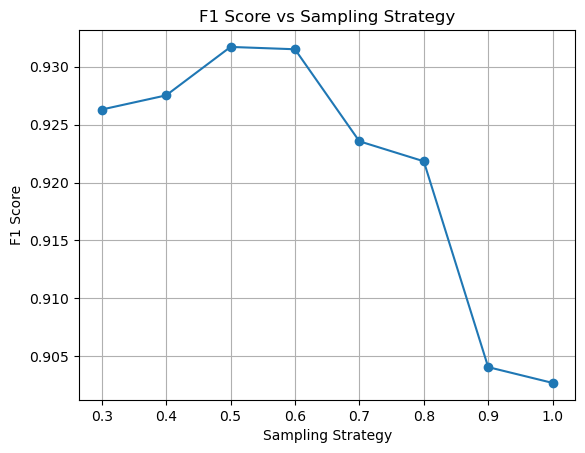

In [113]:
import matplotlib.pyplot as plt

sampling_strategies = [i/10 for i in range(3, 11)]
plt.plot(sampling_strategies, f1_scores_A_real, marker='o')
plt.title('F1 Score vs Sampling Strategy')
plt.xlabel('Sampling Strategy')
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()


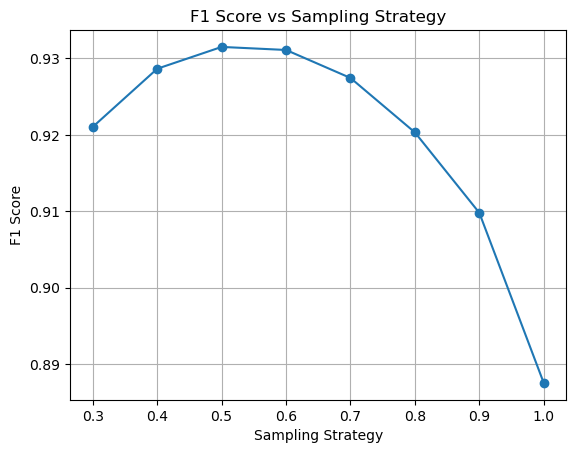

In [114]:
import matplotlib.pyplot as plt

sampling_strategies = [i/10 for i in range(3, 11)]

plt.plot(sampling_strategies, f1_scores_B_real, marker='o')
plt.title('F1 Score vs Sampling Strategy')
plt.xlabel('Sampling Strategy')
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()


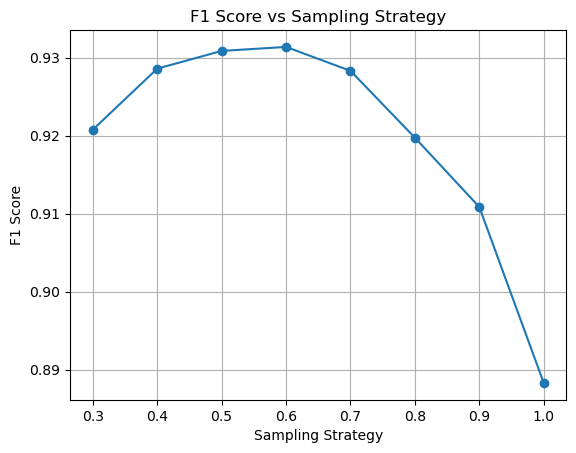

In [115]:
import matplotlib.pyplot as plt

sampling_strategies = [i/10 for i in range(3, 11)]

plt.plot(sampling_strategies, f1_scores_S_real, marker='o')
plt.title('F1 Score vs Sampling Strategy')
plt.xlabel('Sampling Strategy')
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()


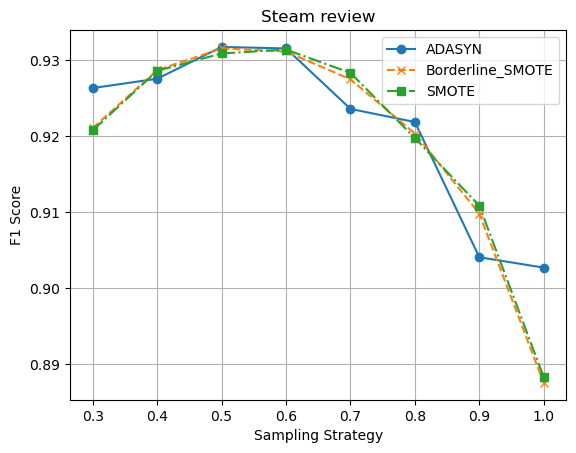

In [120]:
import matplotlib.pyplot as plt

sampling_strategies = [i/10 for i in range(3, 11)]
plt.plot(sampling_strategies, f1_scores_A_real, marker='o', linestyle='-', label='ADASYN')
plt.plot(sampling_strategies, f1_scores_B_real, marker='x', linestyle='--', label='Borderline_SMOTE')
plt.plot(sampling_strategies, f1_scores_S_real, marker='s', linestyle='-.', label='SMOTE')

#plt.plot(sampling_strategies, f1_scores_A, marker='o')
plt.title('Steam review')
plt.xlabel('Sampling Strategy')
plt.ylabel('F1 Score')
plt.grid(True)
#plt.ylim(0.91, 0.96)
#plt.axhline(y=original_f1_real, color='r', linestyle='--')
#plt.text(0.3, 0.95, 'Original F1-score', color='red', fontsize=11)
plt.legend()
plt.savefig('C:/Users/trxgfcg/OneDrive/바탕 화면/학위논문_배경득/realdata_result_no3.png')

plt.show()


In [117]:
original_f1_real

0.9117346286590823

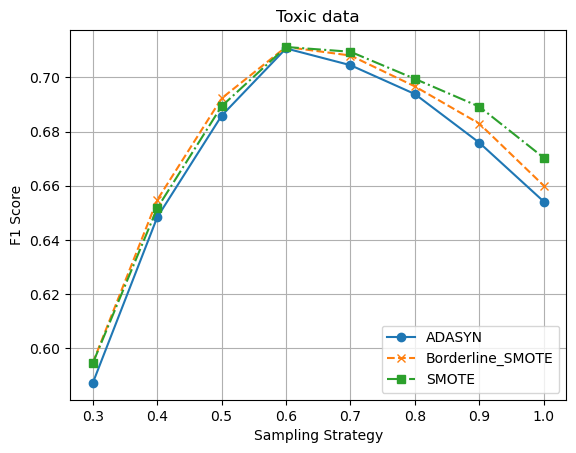

In [121]:
import matplotlib.pyplot as plt

sampling_strategies = [i/10 for i in range(3, 11)]
plt.plot(sampling_strategies, f1_scores_A, marker='o', linestyle='-', label='ADASYN')
plt.plot(sampling_strategies, f1_scores_B, marker='x', linestyle='--', label='Borderline_SMOTE')
plt.plot(sampling_strategies, f1_scores_S, marker='s', linestyle='-.', label='SMOTE')

#plt.plot(sampling_strategies, f1_scores_A, marker='o')
plt.title('Toxic data')
plt.xlabel('Sampling Strategy')
plt.ylabel('F1 Score')
plt.grid(True)
#plt.ylim(0.91, 0.96)
#plt.axhline(y=0.525, color='r', linestyle='--')
#plt.text(0.4, 0.525, 'Original F1-score'+ str( 0.236), color='red', fontsize=11)
plt.legend(loc='lower right')
plt.savefig('C:/Users/trxgfcg/OneDrive/바탕 화면/학위논문_배경득/Toxicdata_result_no3.png')

plt.show()


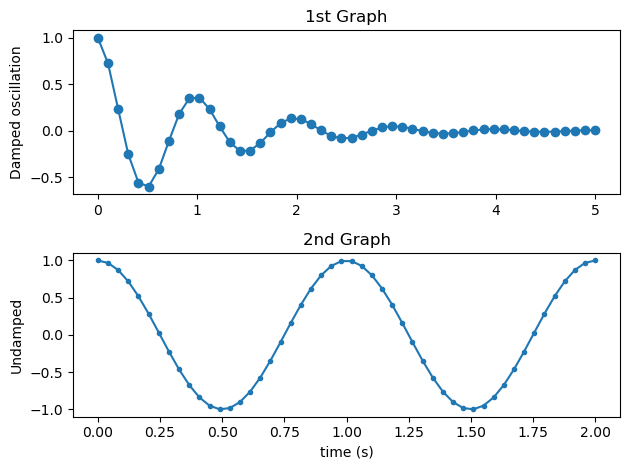

In [119]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)                # nrows=2, ncols=1, index=1
plt.plot(x1, y1, 'o-')
plt.title('1st Graph')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)                # nrows=2, ncols=1, index=2
plt.plot(x2, y2, '.-')
plt.title('2nd Graph')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.tight_layout()
# plt.show()
plt.savefig('C:/Users/trxgfcg/OneDrive/바탕 화면/학위논문_배경득/savefig_default.png')